In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


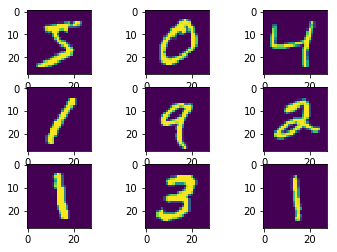

In [27]:
from scipy.misc import toimage
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(toimage(X_train[i]))

plt.show()

In [28]:
##  觀察：Labeled Data 只有一個陣列

In [29]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [31]:
seed = 9487
np.random.seed(seed)

In [32]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32')

In [33]:
X_train = X_train / 255
X_test = X_test / 255

In [34]:
X_train.shape

(60000, 784)

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [13]:
## Q: 為什麼要轉成多陣列？  Ａ：因為要對應到機率，0~9誰的機率高，就是誰
y_train 

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

## One Layer 10 Neurons Prformance

In [22]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=28*28, kernel_initializer = 'normal' ,
            activation='softmax'))
        
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = [ 'accuracy' ])
    return model

In [25]:
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
2s - loss: 0.5552 - acc: 0.8572 - val_loss: 0.3332 - val_acc: 0.9117
Epoch 2/10
2s - loss: 0.3251 - acc: 0.9102 - val_loss: 0.2954 - val_acc: 0.9193
Epoch 3/10
1s - loss: 0.2962 - acc: 0.9172 - val_loss: 0.2832 - val_acc: 0.9218
Epoch 4/10
1s - loss: 0.2825 - acc: 0.9209 - val_loss: 0.2746 - val_acc: 0.9225
Epoch 5/10
2s - loss: 0.2741 - acc: 0.9230 - val_loss: 0.2706 - val_acc: 0.9238
Epoch 6/10
1s - loss: 0.2682 - acc: 0.9258 - val_loss: 0.2670 - val_acc: 0.9266
Epoch 7/10
1s - loss: 0.2639 - acc: 0.9271 - val_loss: 0.2688 - val_acc: 0.9240
Epoch 8/10
1s - loss: 0.2604 - acc: 0.9278 - val_loss: 0.2647 - val_acc: 0.9260
Epoch 9/10
2s - loss: 0.2576 - acc: 0.9285 - val_loss: 0.2643 - val_acc: 0.9256
Epoch 10/10
1s - loss: 0.2545 - acc: 0.9288 - val_loss: 0.2620 - val_acc: 0.9268
Baseline Error: 7.32%


## Two Layers, each 10 Neurons, with Relu ACT

In [26]:
def  two_layers_model():
    model = Sequential()
    model.add(Dense(10, input_dim=28*28, kernel_initializer = 'normal' ,
            activation='relu'))
    
    model.add(Dense(10, kernel_initializer = 'normal' , activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = [ 'accuracy' ])
    return model

model = two_layers_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
2s - loss: 0.7083 - acc: 0.7919 - val_loss: 0.3457 - val_acc: 0.9034
Epoch 2/10
2s - loss: 0.3332 - acc: 0.9051 - val_loss: 0.2944 - val_acc: 0.9167
Epoch 3/10
2s - loss: 0.2983 - acc: 0.9147 - val_loss: 0.2793 - val_acc: 0.9208
Epoch 4/10
2s - loss: 0.2793 - acc: 0.9195 - val_loss: 0.2643 - val_acc: 0.9235
Epoch 5/10
2s - loss: 0.2649 - acc: 0.9239 - val_loss: 0.2572 - val_acc: 0.9260
Epoch 6/10
2s - loss: 0.2529 - acc: 0.9269 - val_loss: 0.2473 - val_acc: 0.9280
Epoch 7/10
2s - loss: 0.2434 - acc: 0.9302 - val_loss: 0.2419 - val_acc: 0.9298
Epoch 8/10
2s - loss: 0.2355 - acc: 0.9321 - val_loss: 0.2393 - val_acc: 0.9293
Epoch 9/10
2s - loss: 0.2294 - acc: 0.9344 - val_loss: 0.2323 - val_acc: 0.9336
Epoch 10/10
2s - loss: 0.2239 - acc: 0.9353 - val_loss: 0.2266 - val_acc: 0.9352
Baseline Error: 6.48%


## Two Layers, each 10 Neurons with tiny shift weights

In [27]:
from keras import initializers

In [32]:
def tiny_shift_model():
    model = Sequential()
    model.add(Dense(10, input_dim=28*28, 
                    kernel_initializer = initializers.TruncatedNormal(mean=0.0001, stddev=0.01, seed=9487) ,
                    activation='relu'))
    
    model.add(Dense(10, kernel_initializer = 'normal' , activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = [ 'accuracy' ])
    return model

model = tiny_shift_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
2s - loss: 0.6787 - acc: 0.8268 - val_loss: 0.3469 - val_acc: 0.9058
Epoch 2/10
2s - loss: 0.3304 - acc: 0.9063 - val_loss: 0.2970 - val_acc: 0.9173
Epoch 3/10
2s - loss: 0.2943 - acc: 0.9166 - val_loss: 0.2717 - val_acc: 0.9228
Epoch 4/10
2s - loss: 0.2745 - acc: 0.9224 - val_loss: 0.2593 - val_acc: 0.9262
Epoch 5/10
2s - loss: 0.2605 - acc: 0.9266 - val_loss: 0.2507 - val_acc: 0.9293
Epoch 6/10
2s - loss: 0.2497 - acc: 0.9296 - val_loss: 0.2430 - val_acc: 0.9323
Epoch 7/10
2s - loss: 0.2400 - acc: 0.9322 - val_loss: 0.2438 - val_acc: 0.9313
Epoch 8/10
2s - loss: 0.2314 - acc: 0.9343 - val_loss: 0.2307 - val_acc: 0.9360
Epoch 9/10
2s - loss: 0.2247 - acc: 0.9366 - val_loss: 0.2294 - val_acc: 0.9361
Epoch 10/10
2s - loss: 0.2191 - acc: 0.9380 - val_loss: 0.2222 - val_acc: 0.9377
Baseline Error: 6.23%


## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.misc import toimage

/Users/Joel/anaconda/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
digits = load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [47]:
X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [37]:
X.shape, digits['images'].shape

((1797, 64), (1797, 8, 8))

In [46]:
X_test.shape

(1347,)

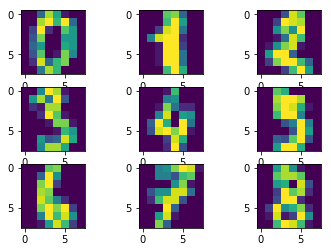

In [24]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(toimage(digits['images'][i]))
plt.show()

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.97999999999999998

<IPython.core.display.Javascript object>


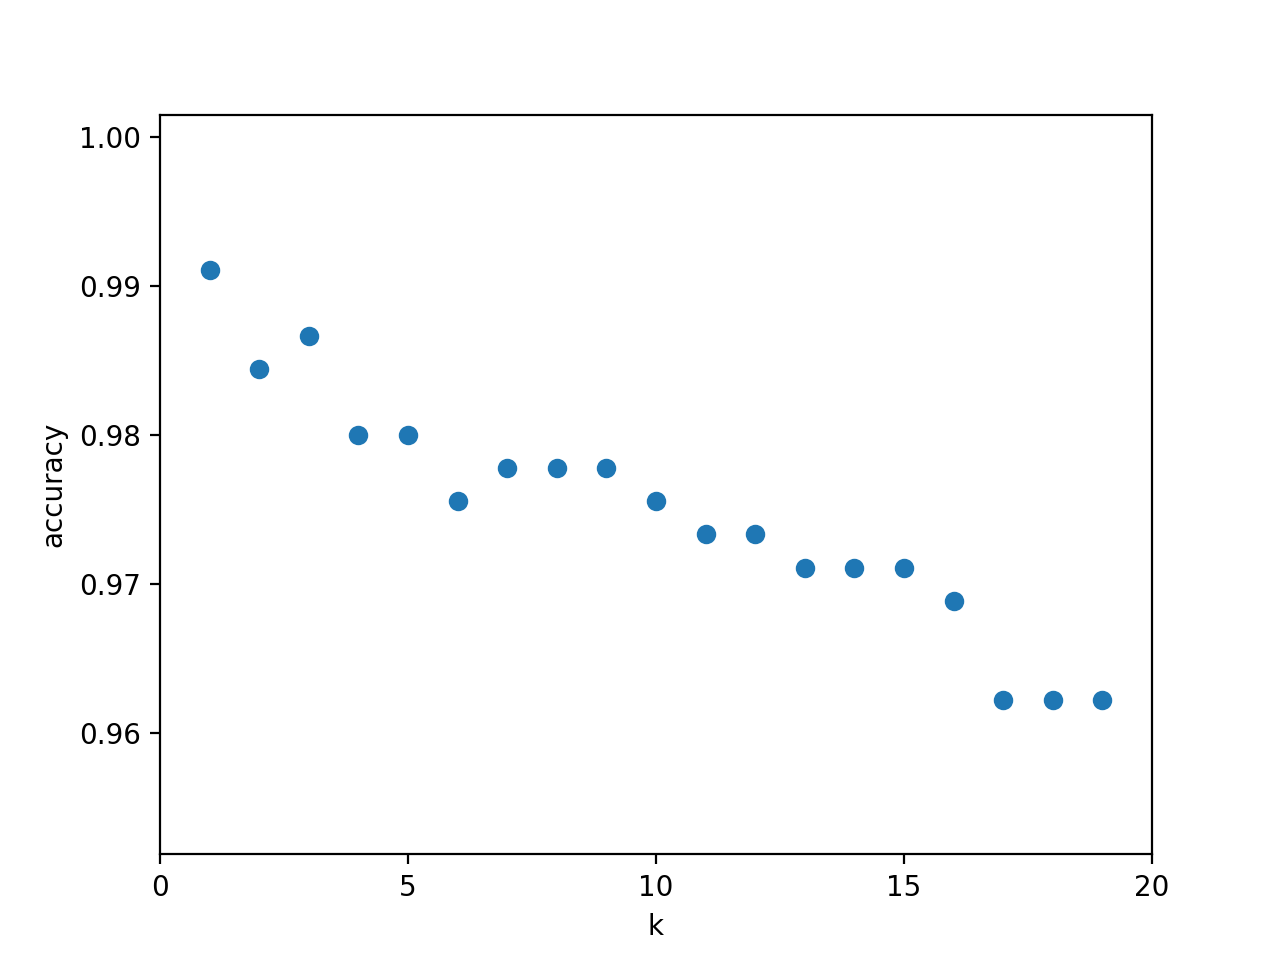

In [54]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32')

In [28]:
X_train[:3000,:].shape, y_train[:3000].shape, X_test.shape, y_test.shape

((3000, 784), (3000,), (10000, 784), (10000,))

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train[:3000,:], y_train[:3000])
knn.score(X_test, y_test)

0.91679999999999995

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train[:5000,:], y_train[:5000])
knn.score(X_test, y_test)

0.9325